In [6]:
import os
import sys

# Ensure the root directory is in the Python path
project_root = os.getcwd()  # Root is the current directory (where the notebook is)
print(f"Project Root: {project_root}")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data_preprocessing import DataPreprocessor

# Path to the CSV file
file_path = "./data/raw/financial_regression.csv"
print(f"File Path Exists: {os.path.exists(file_path)}")  # Check if the file exists

# Create an instance of the DataPreprocessor
dp = DataPreprocessor(file_path=file_path)

# Preprocess the data
data = dp.preprocess()


Project Root: c:\AIGC\Carrer Dev Prep\Final Project\AIGC-5005-0NA-Final-Project\notebooks
File Path Exists: True
Data has been loaded
No null values found


In [7]:
data.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0
5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,...,46.98,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Display columns with missing values

# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values in the dataset!")
else:
    print("Missing values found in the dataset.")


Series([], dtype: int64)
No missing values in the dataset!


## Summary Statistics

In [11]:
# Statistical summary of numerical columns
print(data.describe())

# Check for unique values in the date column
print(data['date'].nunique(), "unique dates")


                                date   sp500 open   sp500 high    sp500 low  \
count                           3719  3719.000000  3719.000000  3719.000000   
mean   2017-06-03 14:26:56.563592448   268.732724   270.179765   267.157446   
min              2010-01-14 00:00:00   103.110000   103.420000   101.130000   
25%              2013-09-24 12:00:00   169.715000   170.175000   169.030000   
50%              2017-06-05 00:00:00   241.180000   242.080000   239.450000   
75%              2021-02-11 12:00:00   374.455000   377.800000   371.045000   
max              2024-10-23 00:00:00   585.910000   586.120000   582.580000   
std                              NaN   121.374890   122.024860   120.663204   

       sp500 close  sp500 volume  sp500 high-low  nasdaq open  nasdaq high  \
count  3719.000000  3.719000e+03     3719.000000  3719.000000  3719.000000   
mean    268.779352  1.124206e+08        3.022320   181.394495   182.689784   
min     102.200000  1.708170e+05        0.300000    42

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Correlation Analysis

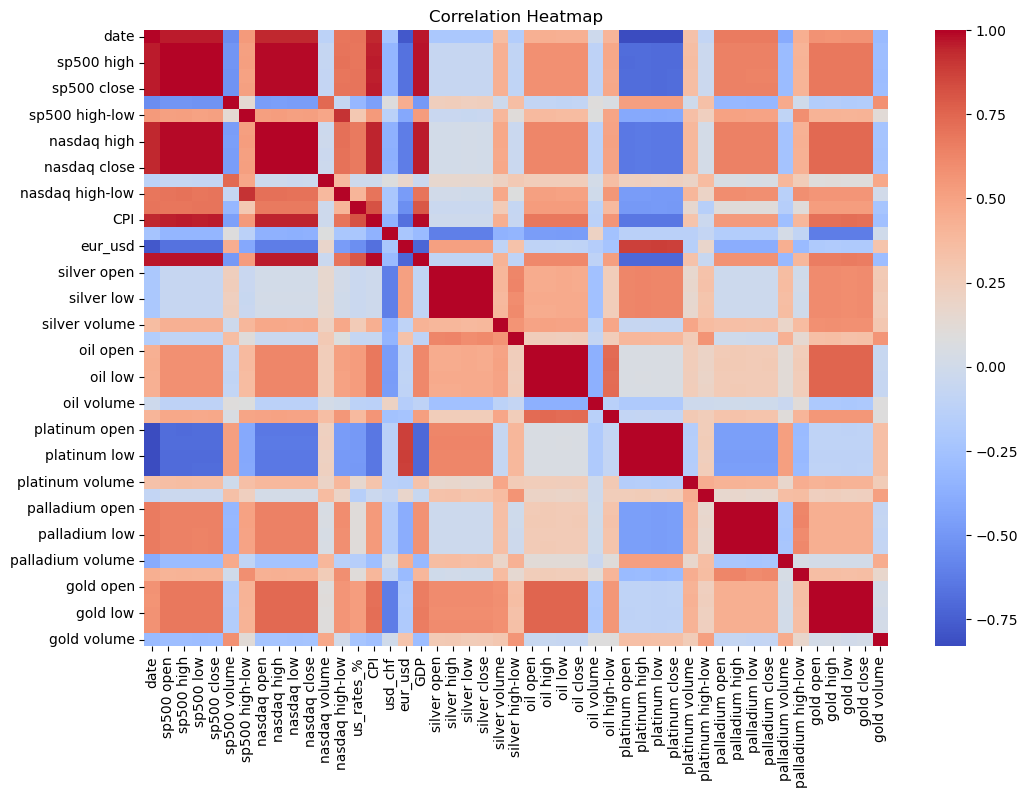

Top correlated features with 'gold close':
gold close     1.000000
gold low       0.999764
gold high      0.999743
gold open      0.999463
oil close      0.754307
oil high       0.754081
oil low        0.754048
oil open       0.753937
nasdaq high    0.738573
nasdaq open    0.738189
Name: gold close, dtype: float64


In [15]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Focus on gold price correlation
gold_corr = correlation_matrix['gold close'].sort_values(ascending=False)
print("Top correlated features with 'gold close':")
print(gold_corr.head(10))


In [13]:
# Filter the correlation matrix to exclude columns related to 'gold'
non_gold_columns = [col for col in correlation_matrix.columns if 'gold' not in col.lower()]

# Focus on correlations with 'gold close' excluding gold-related features
filtered_corr_matrix = correlation_matrix.loc[non_gold_columns]
gold_corr = filtered_corr_matrix['gold close'].sort_values(ascending=False)

# Display the top correlated features
print("Top correlated features with 'gold close' (excluding gold-related features):")
print(gold_corr.head(10))


Top correlated features with 'gold close' (excluding gold-related features):
oil close       0.754307
oil high        0.754081
oil low         0.754048
oil open        0.753937
nasdaq high     0.738573
nasdaq open     0.738189
nasdaq close    0.738153
nasdaq low      0.737749
CPI             0.712234
sp500 high      0.681964
Name: gold close, dtype: float64


###  Feature Trends Over Time

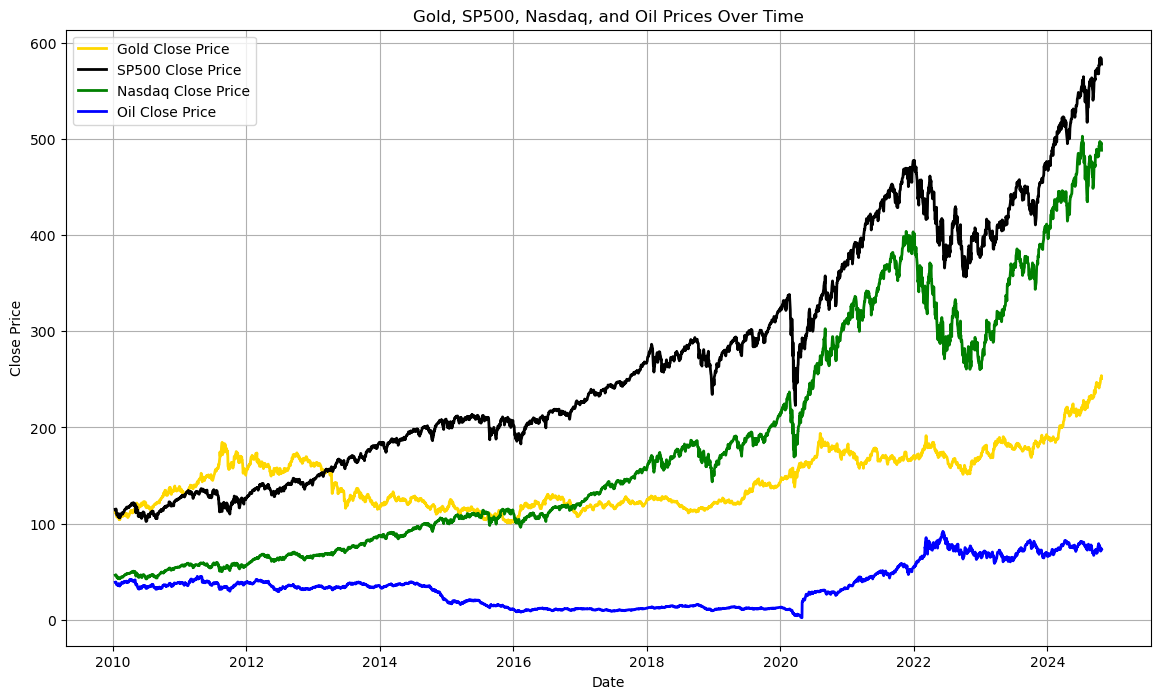

In [19]:
# Convert the date column to datetime if not already done
data['date'] = pd.to_datetime(data['date'])

# Plot Gold, SP500, Nasdaq, and Oil close prices for comparison
plt.figure(figsize=(14, 8))
plt.plot(data['date'], data['gold close'], label='Gold Close Price', color='gold', linewidth=2)
plt.plot(data['date'], data['sp500 close'], label='SP500 Close Price', color='black', linewidth=2)
plt.plot(data['date'], data['nasdaq close'], label='Nasdaq Close Price', color='green', linewidth=2)
plt.plot(data['date'], data['oil close'], label='Oil Close Price', color='blue', linewidth=2)
plt.title("Gold, SP500, Nasdaq, and Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Volatility Analysis

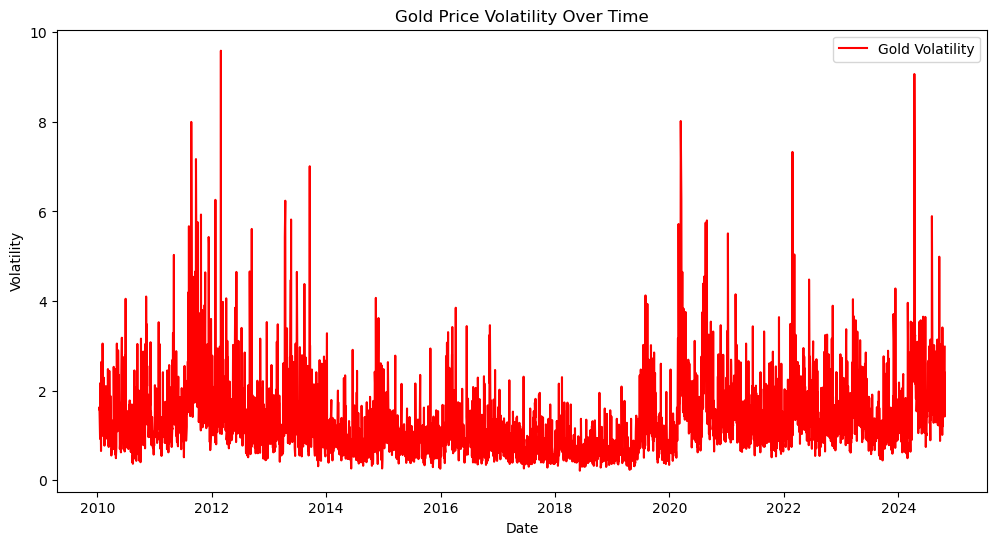

In [20]:
# Calculate volatility
data['gold volatility'] = data['gold high'] - data['gold low']

# Plot gold price volatility over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['gold volatility'], label='Gold Volatility', color='red')
plt.title("Gold Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


## Seasonal Trends

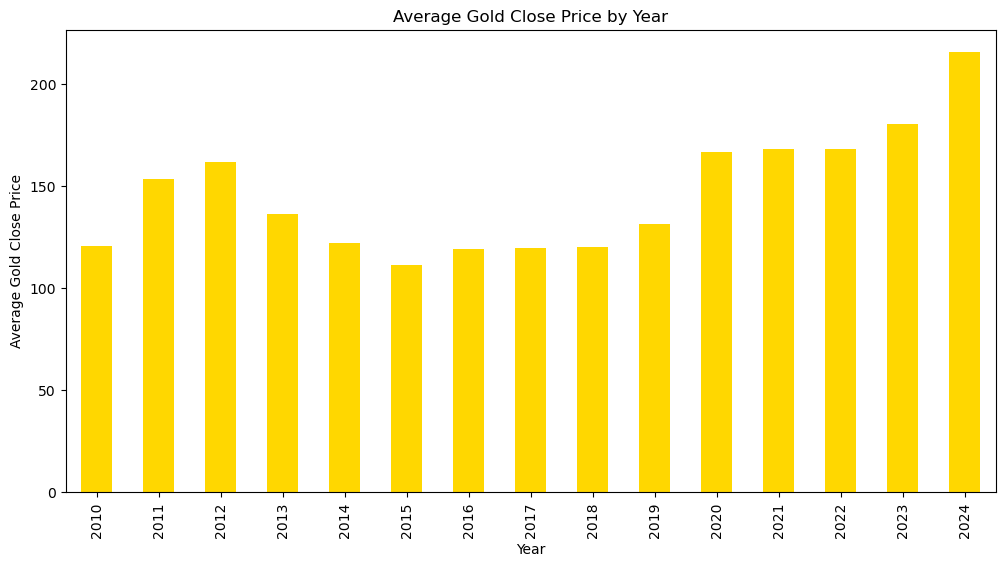

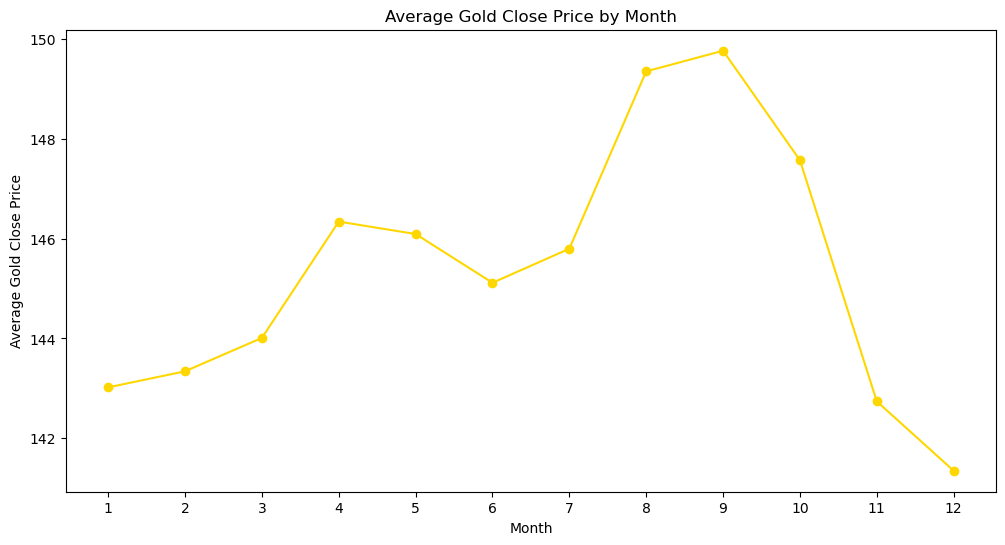

In [22]:
# Extract year and month from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Group by year and plot average gold close price
gold_yearly_avg = data.groupby('year')['gold close'].mean()

plt.figure(figsize=(12, 6))
gold_yearly_avg.plot(kind='bar', color='gold')
plt.title("Average Gold Close Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Gold Close Price")
plt.show()

# Monthly average gold prices
gold_monthly_avg = data.groupby('month')['gold close'].mean()

plt.figure(figsize=(12, 6))
gold_monthly_avg.plot(kind='line', color='gold', marker='o')
plt.title("Average Gold Close Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Gold Close Price")
plt.xticks(range(1, 13))
plt.show()


###  Gold Price vs Other Commodities

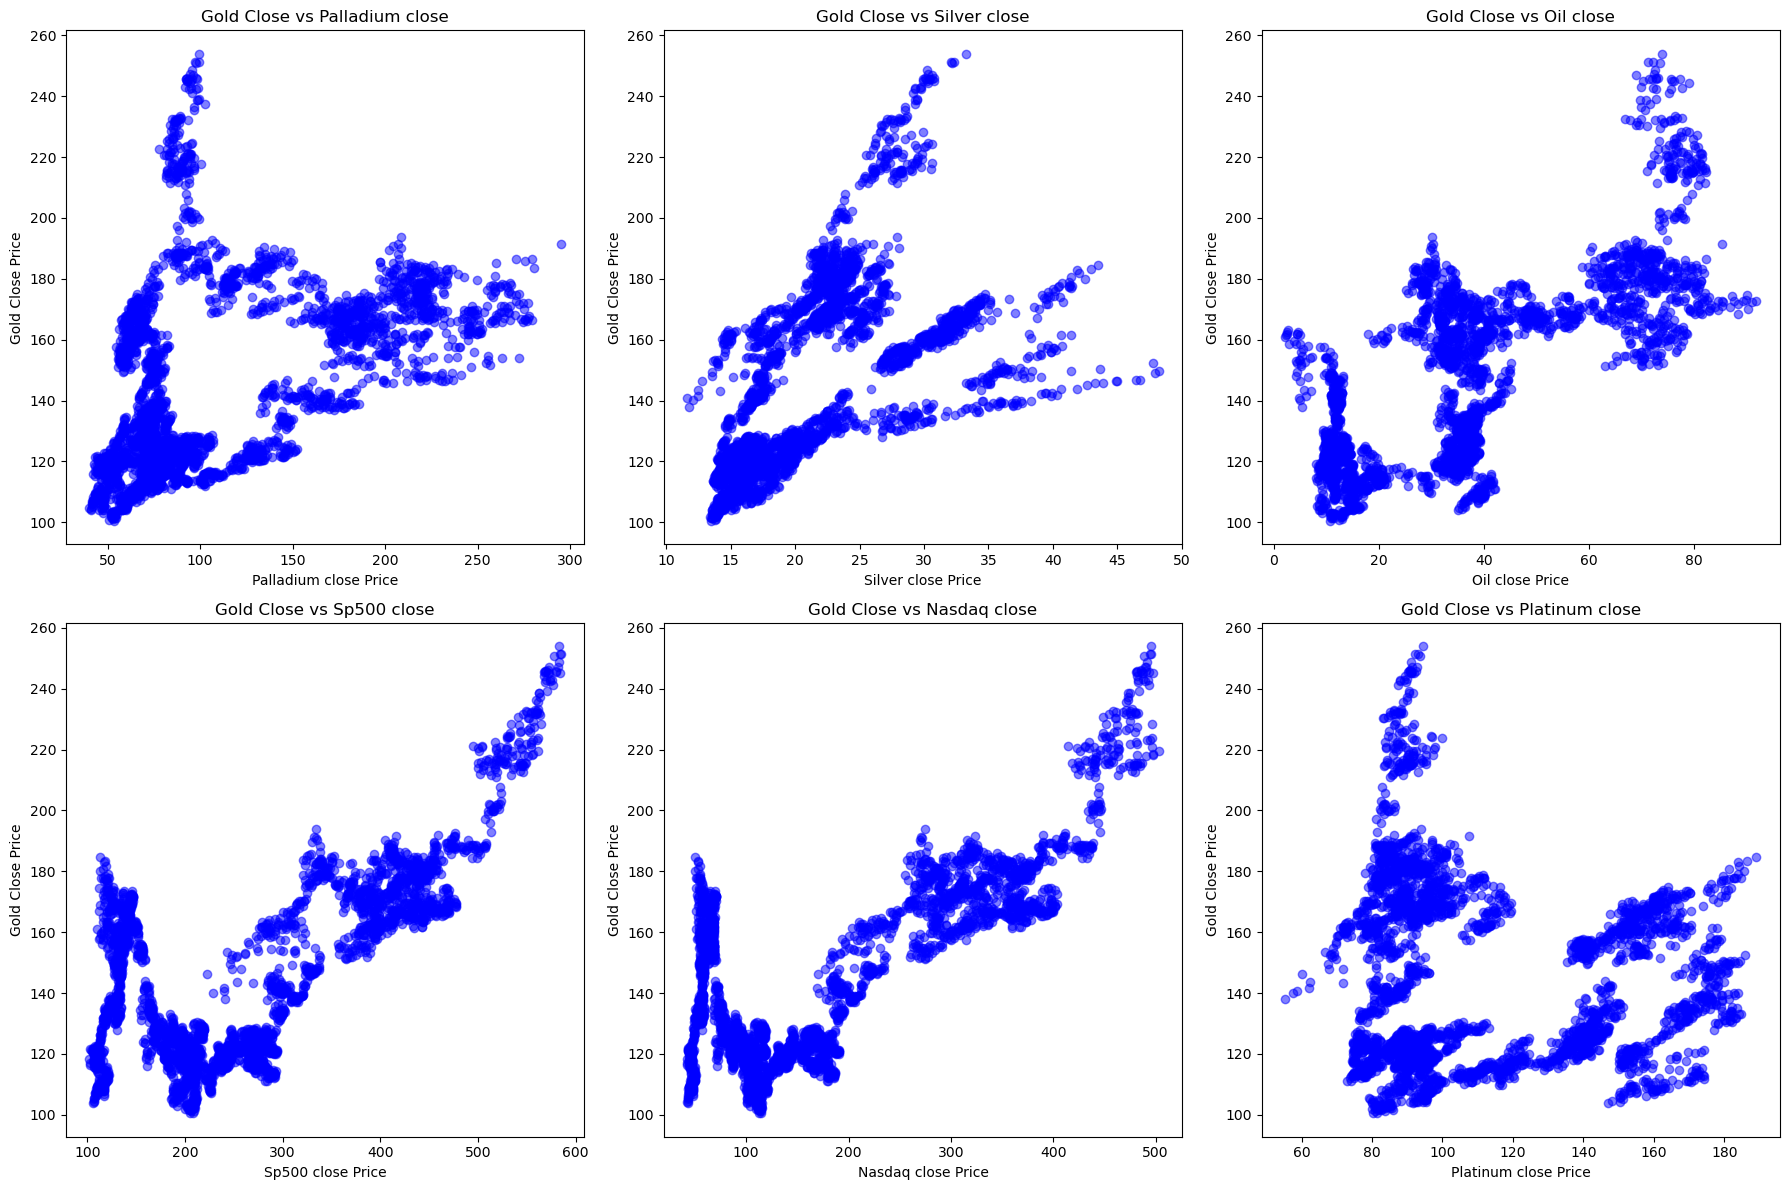

Correlation between gold and palladium close: 0.4390377995921868
Correlation between gold and silver close: 0.6010856379987307
Correlation between gold and oil close: 0.7543071553263999
Correlation between gold and sp500 close: 0.681309171938341
Correlation between gold and nasdaq close: 0.7381525675051163
Correlation between gold and platinum close: -0.10673316955716529


In [23]:
# List of commodity columns to compare with gold close
commodities = ['palladium close', 'silver close', 'oil close', 'sp500 close', 'nasdaq close', 'platinum close']

# Plot scatter plots for gold vs each commodity
plt.figure(figsize=(18, 12))

for i, commodity in enumerate(commodities, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, subplot index
    plt.scatter(data[commodity], data['gold close'], color='blue', alpha=0.5)
    plt.title(f"Gold Close vs {commodity.capitalize()}")
    plt.xlabel(f"{commodity.capitalize()} Price")
    plt.ylabel("Gold Close Price")

plt.tight_layout()  # Adjust subplots to fit
plt.show()

# Calculate and print correlation coefficients for each commodity with gold close
for commodity in commodities:
    correlation = data['gold close'].corr(data[commodity])
    print(f"Correlation between gold and {commodity}: {correlation}")
